**Q2.(b)** Modify the perceptron learning algorithm minimally so that you can train the perceptron with data set D. Note that using a simple conditional statement to convert the labels
into +1 and −1 is not recommended. Implement your algorithm in Python (using the perceptron code template posted in drive) and highlight the changes you made with appropriate
comments. Execute your code on a suitable linearly separable data set with maximum 200 data
points in each class (classes 0 and 1) and plot the behavior of the separating hyperplane during
the execution.

In [11]:
#import relevant libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.utils import shuffle

In [12]:
#Following packages used for animation
import matplotlib.animation as animation 
from IPython.display import HTML

#Linearly-Separable Data

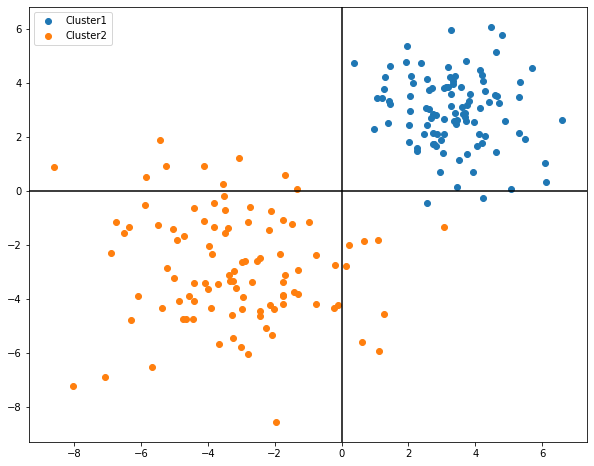

In [13]:
#prepare the data set 
n = 100 #no. of points
np.random.seed(1) #seeding the random number generator is useful for reproducibility

#generate data points for cluster 1 from a Gaussian distribution
#Fill appropriate code here 
mean1 = [3,3]
cov1 = [[2,0],[0,2]]
cluster1 = np.random.multivariate_normal(mean1, cov1, n)

#generating data points for cluster 2  from another Gaussian distribution
#fill appropriate code here 
mean2 = [-3,-3]
cov2 = [[4,0],[0,4]]
cluster2 = np.random.multivariate_normal(mean2, cov2, n)

#generating target values for both clusters
#fill appropriate code here
cl1_y = np.ones(n) #cluster1 is labeled +1
cl2_y = np.zeros(n) #cluster2 is labeled 0

#forming a dataset containing both clusters
#fill appropriate code here 
#X = ?? 
#Y = ??
X = np.concatenate((cluster1,cluster2), axis=0)
Y = np.concatenate((cl1_y,cl2_y), axis=0)

#Ploting clusters
#Fill appropriate code 
#plt.scatter(??)
#plt.scatter(???)
#plt.show()
cl1_x1, cl1_x2 = cluster1.T
cl2_x1, cl2_x2 = cluster2.T
plt.figure(figsize=(10,8))
plt.scatter(cl1_x1, cl1_x2, label='Cluster1')
plt.scatter(cl2_x1, cl2_x2, label='Cluster2')
plt.axvline(x=0, color='black')
plt.axhline(y=0, color='black')
plt.legend(loc=2)
plt.show()

##Generic Perceptron learning algorithm (Preet - 18d110019)
- Changes are made in this cell
- I have used the same logic as the previous perceptron by manipulating the target set
- Note that we haven't explicitly changed tha dataset D given in the question
- By minimum change in the original model, this model works for target values 0 & 1


In [42]:
#training algorithm for perceptron
#input argument: initial weight vector, data set feature matrix X, data set label vector Y, max epochs
#outputs: final weight vector obtained after training, list of points where update happened, weights obtained after each update
def perceptron_train(initial_w, X, Y, max_epochs): 
  weights_updates = []
  points_updates = []

  epoch = 0
  num_updates_in_each_epoch = 0 

  w = initial_w
  #Perceptron algorithm
  while epoch<max_epochs:
    num_updates_in_each_epoch = 0
    X, Y = shuffle(X, Y) #shuffling data is useful to prevent any particular ordering in data affecting the performance
    #Fill in appropriate code 

    for x,y in zip(X,Y):
      if 2*(y-0.5)*np.dot(x,w)<0: # This manipulates the target values to our use
        w = w + 2*(y-0.5)*x # proceeding with the same update rule as in the original model
        #2*(1-0.5)=1
        #2*(0-0.5)=-1
        weights_updates.append(w)
        points_updates.append(x)
    epoch+=1 #one epoch denotes one full pass over the data 
    print('After {0} epochs, num updates in this epoch={1}, total updates={2}'.format(epoch,num_updates_in_each_epoch,len(weights_updates)))
  print('Perceptron algo complete! Weights updated', len(weights_updates), 'no. of times')
  return w, weights_updates, points_updates

## Perceptron Without Threshold

In [45]:
#Initializing weights 
initial_w = np.random.rand(2)

#set max epochs to train perceptron
max_epochs = 15

#Call perceptron training algorithm and obtain the weight vector, weights obtained during updates and the data points causing updates
w,weights,points = perceptron_train(initial_w,X,Y,max_epochs)



After 1 epochs, num updates in this epoch=0, total updates=4
After 2 epochs, num updates in this epoch=0, total updates=7
After 3 epochs, num updates in this epoch=0, total updates=8
After 4 epochs, num updates in this epoch=0, total updates=10
After 5 epochs, num updates in this epoch=0, total updates=12
After 6 epochs, num updates in this epoch=0, total updates=14
After 7 epochs, num updates in this epoch=0, total updates=16
After 8 epochs, num updates in this epoch=0, total updates=17
After 9 epochs, num updates in this epoch=0, total updates=17
After 10 epochs, num updates in this epoch=0, total updates=17
After 11 epochs, num updates in this epoch=0, total updates=17
After 12 epochs, num updates in this epoch=0, total updates=17
After 13 epochs, num updates in this epoch=0, total updates=17
After 14 epochs, num updates in this epoch=0, total updates=17
After 15 epochs, num updates in this epoch=0, total updates=17
Perceptron algo complete! Weights updated 17 no. of times


In [46]:
print(2*(Y-0.5)*np.dot(X,w)<0)

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

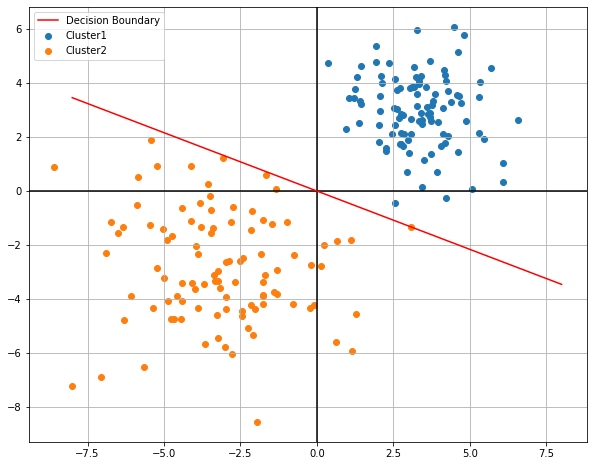

In [47]:
#plotting decision boundary
#Write code to plot the decision boundary along with the clusters
cl1_x1, cl1_x2 = cluster1.T
cl2_x1, cl2_x2 = cluster2.T
plt.figure(figsize=(10,8))
plt.scatter(cl1_x1, cl1_x2, label='Cluster1')
plt.scatter(cl2_x1, cl2_x2, label='Cluster2')
plt.axvline(x=0, color='black')
plt.axhline(y=0, color='black')

x1 = np.linspace(-8,8,100)
x2 = -(w[0]/w[1])*x1

plt.plot(x1, x2, '-r', label='Decision Boundary')
plt.legend(loc=2)
plt.grid()
plt.show()

###Animation

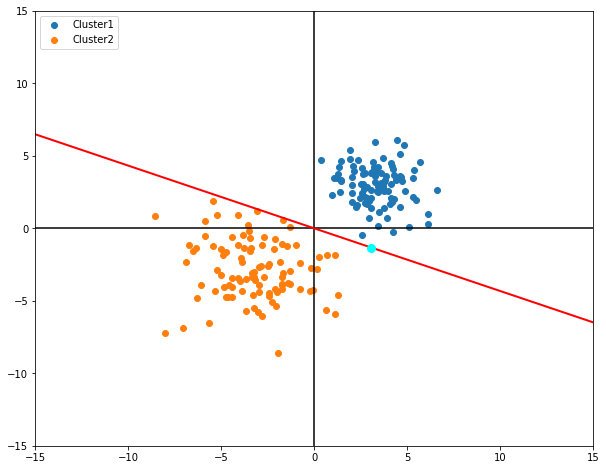

In [52]:
#You can add some code to animate the decision boundary's behavior upon every mistake 
fig = plt.figure(figsize=(10,8))
axis = plt.axes(xlim=(-15,15), ylim=(-15,15))
axis.scatter(cl1_x1, cl1_x2, label='Cluster1')
axis.scatter(cl2_x1, cl2_x2, label='Cluster2')
axis.axvline(x=0, color='black')
axis.axhline(y=0, color='black')
axis.legend(loc=2)

line, = axis.plot([], [], lw=2, color='red')
point, = axis.plot([], [], marker='o', markersize=8, color='cyan')

def init():
  line.set_data([], [])
  point.set_data([], [])
  return line, point
def animate(i):
  w = weights[i]
  x1data = np.linspace(-15,15,100)
  x2data = -(w[0]/w[1])*x1data
  x1,x2 =points[i]
  point.set_data([x1], [x2])
  line.set_data(x1data, x2data)
  return line,point

anim1 = animation.FuncAnimation(fig, animate, init_func = init, \
                                frames=len(weights), interval = 1000, blit = True)

HTML(anim1.to_html5_video())

##Perceptron With Threshold

In [ ]:
#Write code to incorporate a threshold to perceptron and train it 


In [ ]:
#Write code to plot the decision boundary for perceptron with threshold

###Animation

In [ ]:
#Write code to animate the behavior of decision surface if necessary 

#Non-Separable Data

In [ ]:
n = 100 #no. of points
np.random.seed(3)

#Write code to create data that cannot be separated by a hyperplane
#Plot the data 

##Perceptron With Threshold

In [ ]:
#Use a perceptron with threshold to train on the non-separable data set 

In [ ]:
#Check how you can use the percetpron training algorithm to identify a potentially non-separable data set 

###Animation

In [ ]:
#Write code to show animated behavior of the separating hyperplane for non-separable data